__Before using the codes below, notation:__

1. for the mixture component, using a sliced-like list. (Could use the liquid volume or mass ratio)
<p>eg: Ethanol: Water: Toluene = [::] </p>

# Retrieve the wavelength for the binodal line

## Import packages and set initial parameters for the graphs

In [1]:
from dataGadgets import *

plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['figure.dpi'] = 100

# for the folder where stores the *.csv file for the different mixture.

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
Functions successfully imported!



In [2]:
# Other parameters 

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 
plt.rcParams['font.size'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['lines.linewidth'] = 2


## Define the folder path for the spectra

In [3]:
specFold = 'curve_fit_binodal/'

## set initial guess for the parameters, plot the original data and the fitted line

### For the mixture with the component -- Water: Toluene: Ethanol = [0:1:0]

In [4]:
# csv file format is 'vol W_ vol T_ vol E_sample no_rep no'

raw_sampleT_01 = yld_rawdata(specFold+'sampleT_pure_01.csv',6)
raw_sampleT_02 = yld_rawdata(specFold+'sampleT_pure_02.csv',6)
raw_sampleT_03 = yld_rawdata(specFold+'sampleT_pure_03.csv',6)
raw_sampleT_04 = yld_rawdata(specFold+'sampleT_pure_04.csv',6)
raw_sampleT_05 = yld_rawdata(specFold+'sampleT_pure_05.csv',6)

wv_sampleT_01,inten_sampleT_01 = yld_xy_sliced(raw_sampleT_01)
wv_sampleT_02,inten_sampleT_02 = yld_xy_sliced(raw_sampleT_02)
wv_sampleT_03,inten_sampleT_03 = yld_xy_sliced(raw_sampleT_03)
wv_sampleT_04,inten_sampleT_04 = yld_xy_sliced(raw_sampleT_04)
wv_sampleT_05,inten_sampleT_05 = yld_xy_sliced(raw_sampleT_05)

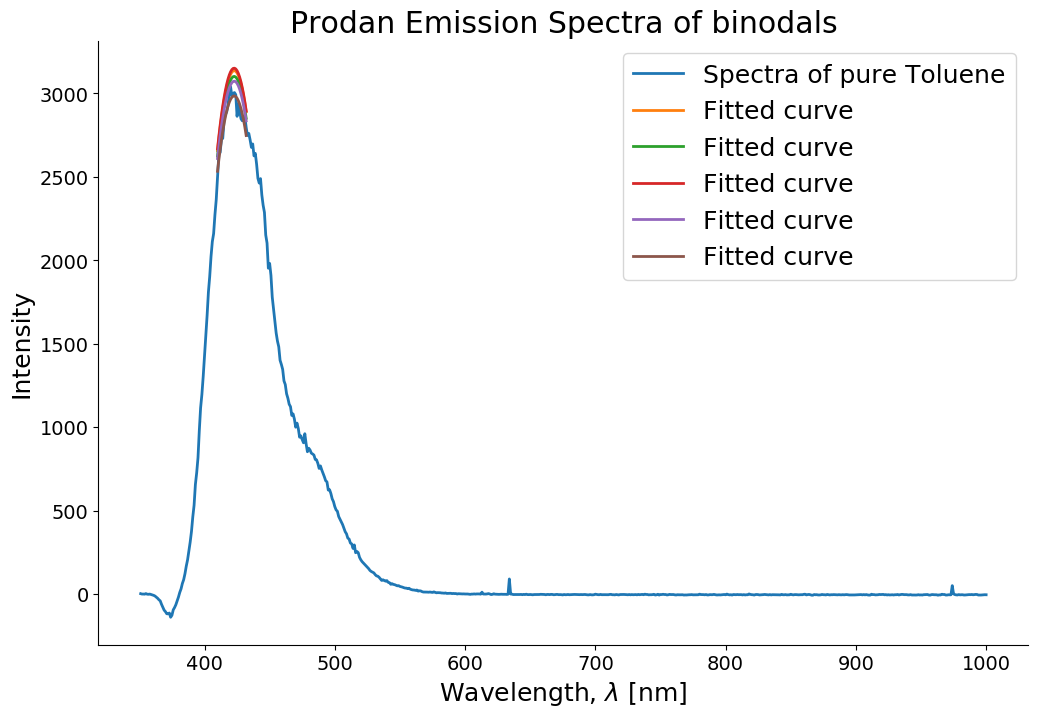

Ave. maximum wavelength for the sample is: 422.7707479023763 nm
Standard deviation for the max wavelength is: 0.03773914495349216


In [21]:
# Sliced list for the curve fitting
# yld_xy_sliced takes the start & end indexes and slices the wavelengths & intensities

sampleT_01_bg = 410
sampleT_01_end = 433

wv_fit_sampleT_01,inten_fit_sampleT_01 = yld_xy_sliced(raw_sampleT_01,sampleT_01_bg,sampleT_01_end)
wv_fit_sampleT_02,inten_fit_sampleT_02 = yld_xy_sliced(raw_sampleT_02,sampleT_01_bg,sampleT_01_end)
wv_fit_sampleT_03,inten_fit_sampleT_03 = yld_xy_sliced(raw_sampleT_03,sampleT_01_bg,sampleT_01_end)
wv_fit_sampleT_04,inten_fit_sampleT_04 = yld_xy_sliced(raw_sampleT_04,sampleT_01_bg,sampleT_01_end)
wv_fit_sampleT_05,inten_fit_sampleT_05 = yld_xy_sliced(raw_sampleT_05,sampleT_01_bg,sampleT_01_end)

inten_fit_sampleT = [inten_fit_sampleT_01,inten_fit_sampleT_02,inten_fit_sampleT_03,inten_fit_sampleT_04,inten_fit_sampleT_05]

# initial guess for fitted parameters, may need to be changed
# Initial guess for the curve para_curve = a*((x + b)**2) + c in the form [a,b,c]
# a changes curvature, b transforms in x-direction, c transforms in y-direction

initGuessT = [-0.5,-500,1800]
f1_sampleT = []
max_wav_sampleT = []

for i in range(len(inten_fit_sampleT)):
    C_fit = yld_curve_fit_Y(para_curve,wv_fit_sampleT_01,inten_fit_sampleT[i],initGuessT)
    f1_individual = C_fit[0]
    max_wav_individual = C_fit[1]
    f1_sampleT.append(f1_individual)
    max_wav_sampleT.append(max_wav_individual)

ave_max_wav_sampleT = sum(max_wav_sampleT)/len(max_wav_sampleT)
std_max_wav_sampleT = np.std(max_wav_sampleT,ddof=1)

fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.plot(wv_sampleT_05,inten_sampleT_05,marker = '',linestyle = '-',label = 'Spectra of pure Toluene')
plt.plot(wv_fit_sampleT_01,f1_sampleT[0],label = 'Fitted curve')
plt.plot(wv_fit_sampleT_02,f1_sampleT[1],label = 'Fitted curve')
plt.plot(wv_fit_sampleT_03,f1_sampleT[2],label = 'Fitted curve')
plt.plot(wv_fit_sampleT_04,f1_sampleT[3],label = 'Fitted curve')
plt.plot(wv_fit_sampleT_05,f1_sampleT[4],label = 'Fitted curve')

plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra of binodals')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity')
plt.show()

print('Ave. maximum wavelength for the sample is:',ave_max_wav_sampleT,'nm')
print('Standard deviation for the max wavelength is:',std_max_wav_sampleT)

### For the mixture with the component -- Water: Toluene: Ethanol = [1:0:0]

In [23]:
# csv file format is 'vol W_ vol T_ vol E_sample no_rep no'

raw_sampleW_01 = yld_rawdata(specFold+'sampleW_pure_01.csv',6)
raw_sampleW_02 = yld_rawdata(specFold+'sampleW_pure_02.csv',6)
raw_sampleW_03 = yld_rawdata(specFold+'sampleW_pure_03.csv',6)
raw_sampleW_04 = yld_rawdata(specFold+'sampleW_pure_04.csv',6)
raw_sampleW_05 = yld_rawdata(specFold+'sampleW_pure_05.csv',6)

wv_sampleW_01,inten_sampleW_01 = yld_xy_sliced(raw_sampleW_01)
wv_sampleW_02,inten_sampleW_02 = yld_xy_sliced(raw_sampleW_02)
wv_sampleW_03,inten_sampleW_03 = yld_xy_sliced(raw_sampleW_03)
wv_sampleW_04,inten_sampleW_04 = yld_xy_sliced(raw_sampleW_04)
wv_sampleW_05,inten_sampleW_05 = yld_xy_sliced(raw_sampleW_05)

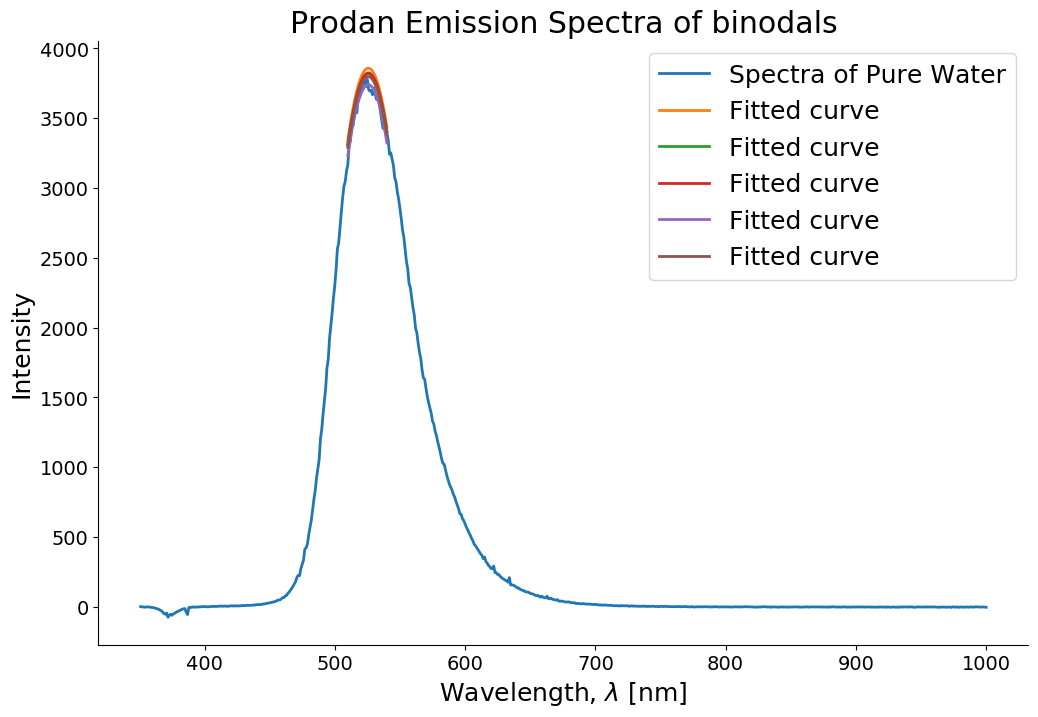

Ave. maximum wavelength for the sample is: 525.7577896073973 nm
Standard deviation for the max wavelength is: 0.00951071214136144


In [56]:
# Sliced list for the curve fitting
# yld_xy_sliced takes the start & end indexes and slices the wavelengths & intensities

sampleW_01_bg = 510 # should be named as sampleW_bg
sampleW_01_end = 541 # same as above

wv_fit_sampleW_01,inten_fit_sampleW_01 = yld_xy_sliced(raw_sampleW_01,sampleW_01_bg,sampleW_01_end)
wv_fit_sampleW_02,inten_fit_sampleW_02 = yld_xy_sliced(raw_sampleW_02,sampleW_01_bg,sampleW_01_end)
wv_fit_sampleW_03,inten_fit_sampleW_03 = yld_xy_sliced(raw_sampleW_03,sampleW_01_bg,sampleW_01_end)
wv_fit_sampleW_04,inten_fit_sampleW_04 = yld_xy_sliced(raw_sampleW_04,sampleW_01_bg,sampleW_01_end)
wv_fit_sampleW_05,inten_fit_sampleW_05 = yld_xy_sliced(raw_sampleW_05,sampleW_01_bg,sampleW_01_end)

inten_fit_sampleW = [inten_fit_sampleW_01,inten_fit_sampleW_02,inten_fit_sampleW_03,inten_fit_sampleW_04,inten_fit_sampleW_05]

# initial guess for fitted parameters, may need to be changed
# Initial guess for the curve para_curve = a*((x + b)**2) + c in the form [a,b,c]
# a changes curvature, b transforms in x-direction, c transforms in y-direction

initGuessW = [-0.5,-500,1800]
f1_sampleW = []
max_wav_sampleW = []

for i in range(len(inten_fit_sampleW)):
    C_fit = yld_curve_fit_Y(para_curve,wv_fit_sampleW_01,inten_fit_sampleW[i],initGuessW)
    f1_individual = C_fit[0]
    max_wav_individual = C_fit[1]
    f1_sampleW.append(f1_individual)
    max_wav_sampleW.append(max_wav_individual)

ave_max_wav_sampleW = sum(max_wav_sampleW)/len(max_wav_sampleW)
std_max_wav_sampleW = np.std(max_wav_sampleW,ddof=1)

fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.plot(wv_sampleW_04,inten_sampleW_04,marker = '',linestyle = '-',label = 'Spectra of Pure Water')
plt.plot(wv_fit_sampleW_01,f1_sampleW[0],label = 'Fitted curve')
plt.plot(wv_fit_sampleW_02,f1_sampleW[1],label = 'Fitted curve')
plt.plot(wv_fit_sampleW_03,f1_sampleW[2],label = 'Fitted curve')
plt.plot(wv_fit_sampleW_04,f1_sampleW[3],label = 'Fitted curve')
plt.plot(wv_fit_sampleW_05,f1_sampleW[4],label = 'Fitted curve')

plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra of binodals')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity')
plt.show()

print('Ave. maximum wavelength for the sample is:',ave_max_wav_sampleW,'nm')
print('Standard deviation for the max wavelength is:',std_max_wav_sampleW)

### For the mixture with the component -- Water: Toluene: Ethanol = [0:0:1]

In [35]:
# csv file format is 'vol W_ vol T_ vol E_sample no_rep no'

raw_sampleE_01 = yld_rawdata(specFold+'sampleE_pure_01.csv',6)
raw_sampleE_02 = yld_rawdata(specFold+'sampleE_pure_02.csv',6)
raw_sampleE_03 = yld_rawdata(specFold+'sampleE_pure_03.csv',6)
raw_sampleE_04 = yld_rawdata(specFold+'sampleE_pure_04.csv',6)
raw_sampleE_05 = yld_rawdata(specFold+'sampleE_pure_05.csv',6)

wv_sampleE_01,inten_sampleE_01 = yld_xy_sliced(raw_sampleE_01)
wv_sampleE_02,inten_sampleE_02 = yld_xy_sliced(raw_sampleE_02)
wv_sampleE_03,inten_sampleE_03 = yld_xy_sliced(raw_sampleE_03)
wv_sampleE_04,inten_sampleE_04 = yld_xy_sliced(raw_sampleE_04)
wv_sampleE_05,inten_sampleE_05 = yld_xy_sliced(raw_sampleE_05)

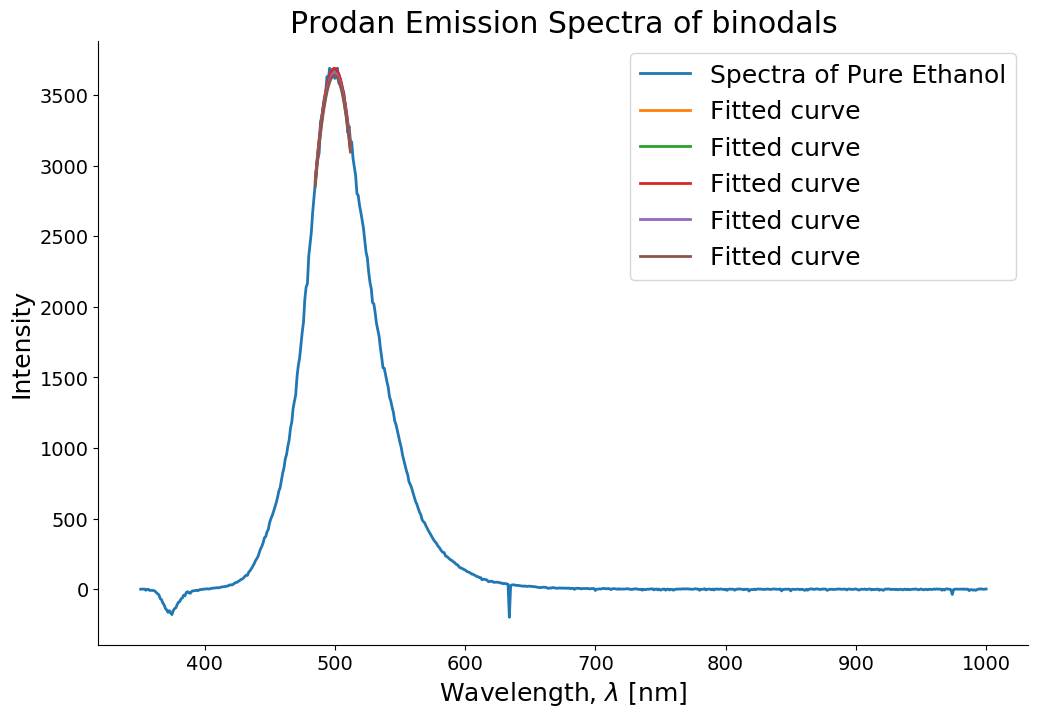

Ave. maximum wavelength for the sample is: 499.7375467965494 nm
Standard deviation for the max wavelength is: 0.00930775496209163


In [55]:
# Sliced list for the curve fitting
# yld_xy_sliced takes the start & end indexes and slices the wavelengths & intensities

sampleE_01_bg = 485 # should be named as sampleE_bg
sampleE_01_end = 513 # same as above

wv_fit_sampleE_01,inten_fit_sampleE_01 = yld_xy_sliced(raw_sampleE_01,sampleE_01_bg,sampleE_01_end)
wv_fit_sampleE_02,inten_fit_sampleE_02 = yld_xy_sliced(raw_sampleE_02,sampleE_01_bg,sampleE_01_end)
wv_fit_sampleE_03,inten_fit_sampleE_03 = yld_xy_sliced(raw_sampleE_03,sampleE_01_bg,sampleE_01_end)
wv_fit_sampleE_04,inten_fit_sampleE_04 = yld_xy_sliced(raw_sampleE_04,sampleE_01_bg,sampleE_01_end)
wv_fit_sampleE_05,inten_fit_sampleE_05 = yld_xy_sliced(raw_sampleE_05,sampleE_01_bg,sampleE_01_end)

inten_fit_sampleE = [inten_fit_sampleE_01,inten_fit_sampleE_02,inten_fit_sampleE_03,inten_fit_sampleE_04,inten_fit_sampleE_05]

# initial guess for fitted parameters, may need to be changed
# Initial guess for the curve para_curve = a*((x + b)**2) + c in the form [a,b,c]
# a changes curvature, b transforms in x-direction, c transforms in y-direction

initGuessE = [-0.5,-500,1800]
f1_sampleE = []
max_wav_sampleE = []

for i in range(len(inten_fit_sampleE)):
    C_fit = yld_curve_fit_Y(para_curve,wv_fit_sampleE_01,inten_fit_sampleE[i],initGuessE)
    f1_individual = C_fit[0]
    max_wav_individual = C_fit[1]
    f1_sampleE.append(f1_individual)
    max_wav_sampleE.append(max_wav_individual)

ave_max_wav_sampleE = sum(max_wav_sampleE)/len(max_wav_sampleE)
std_max_wav_sampleE = np.std(max_wav_sampleE,ddof=1)

fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.plot(wv_sampleE_01,inten_sampleE_01,marker = '',linestyle = '-',label = 'Spectra of Pure Ethanol')
plt.plot(wv_fit_sampleE_01,f1_sampleE[0],label = 'Fitted curve')
plt.plot(wv_fit_sampleE_02,f1_sampleE[1],label = 'Fitted curve')
plt.plot(wv_fit_sampleE_03,f1_sampleE[2],label = 'Fitted curve')
plt.plot(wv_fit_sampleE_04,f1_sampleE[3],label = 'Fitted curve')
plt.plot(wv_fit_sampleE_05,f1_sampleE[4],label = 'Fitted curve')


plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra of binodals')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity')
plt.show()

print('Ave. maximum wavelength for the sample is:',ave_max_wav_sampleE,'nm')
print('Standard deviation for the max wavelength is:',std_max_wav_sampleE)

### For the mixture with the component -- Water: Toluene: Ethanol = [4.0:25.4:]

In [52]:
# csv file format is 'vol W_ vol T_ vol E_sample no_rep no'

raw_sample01_01 = yld_rawdata(specFold+'4W_25.4T_22.1E_sample01_01.csv',6)
raw_sample01_02 = yld_rawdata(specFold+'4W_25.4T_22.1E_sample01_02.csv',6)
raw_sample01_03 = yld_rawdata(specFold+'4W_25.4T_22.1E_sample01_03.csv',6)
raw_sample01_04 = yld_rawdata(specFold+'4W_25.4T_22.1E_sample01_04.csv',6)
raw_sample01_05 = yld_rawdata(specFold+'4W_25.4T_22.1E_sample01_05.csv',6)

wv_sample01_01,inten_sample01_01 = yld_xy_sliced(raw_sample01_01)
wv_sample01_02,inten_sample01_02 = yld_xy_sliced(raw_sample01_02)
wv_sample01_03,inten_sample01_03 = yld_xy_sliced(raw_sample01_03)
wv_sample01_04,inten_sample01_04 = yld_xy_sliced(raw_sample01_04)
wv_sample01_05,inten_sample01_05 = yld_xy_sliced(raw_sample01_05)

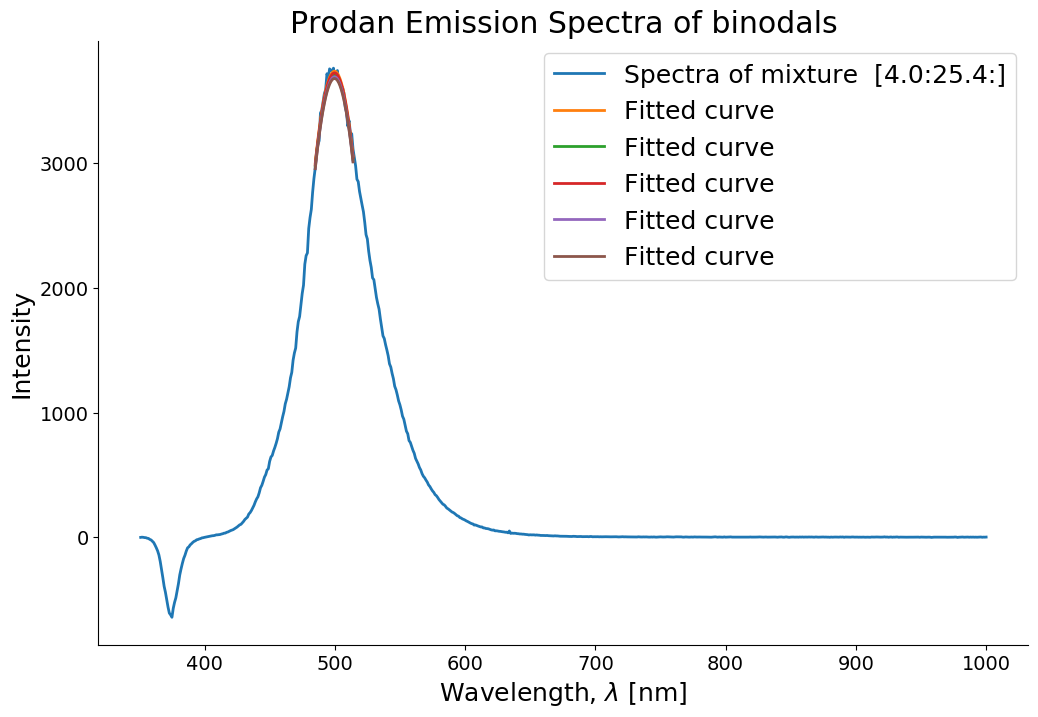

Ave. maximum wavelength for the sample is: 499.7885468660831 nm
Standard deviation for the max wavelength is: 0.011503510474612568


In [54]:
# Sliced list for the curve fitting
# yld_xy_sliced takes the start & end indexes and slices the wavelengths & intensities

sample01_bg = 485
sample01_end = 515

wv_fit_sample01_01,inten_fit_sample01_01 = yld_xy_sliced(raw_sample01_01,sample01_bg,sample01_end)
wv_fit_sample01_02,inten_fit_sample01_02 = yld_xy_sliced(raw_sample01_02,sample01_bg,sample01_end)
wv_fit_sample01_03,inten_fit_sample01_03 = yld_xy_sliced(raw_sample01_03,sample01_bg,sample01_end)
wv_fit_sample01_04,inten_fit_sample01_04 = yld_xy_sliced(raw_sample01_04,sample01_bg,sample01_end)
wv_fit_sample01_05,inten_fit_sample01_05 = yld_xy_sliced(raw_sample01_05,sample01_bg,sample01_end)

inten_fit_sample01 = [inten_fit_sample01_01,inten_fit_sample01_02,inten_fit_sample01_03,inten_fit_sample01_04,inten_fit_sample01_05]

# initial guess for fitted parameters, may need to be changed
# Initial guess for the curve para_curve = a*((x + b)**2) + c in the form [a,b,c]
# a changes curvature, b transforms in x-direction, c transforms in y-direction

initGuess01 = [-0.5,-500,1800]
f1_sample01 = []
max_wav_sample01 = []

for i in range(len(inten_fit_sample01)):
    C_fit = yld_curve_fit_Y(para_curve,wv_fit_sample01_01,inten_fit_sample01[i],initGuess01)
    f1_individual = C_fit[0]
    max_wav_individual = C_fit[1]
    f1_sample01.append(f1_individual)
    max_wav_sample01.append(max_wav_individual)

ave_max_wav_sample01 = sum(max_wav_sample01)/len(max_wav_sample01)
std_max_wav_sample01 = np.std(max_wav_sample01,ddof=1)

fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.plot(wv_sample01_01,inten_sample01_01,marker = '',linestyle = '-',label = 'Spectra of mixture  [4.0:25.4:]')
plt.plot(wv_fit_sample01_01,f1_sample01[0],label = 'Fitted curve')
plt.plot(wv_fit_sample01_02,f1_sample01[1],label = 'Fitted curve')
plt.plot(wv_fit_sample01_03,f1_sample01[2],label = 'Fitted curve')
plt.plot(wv_fit_sample01_04,f1_sample01[3],label = 'Fitted curve')
plt.plot(wv_fit_sample01_05,f1_sample01[4],label = 'Fitted curve')

plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra of binodals')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity')
plt.show()

print('Ave. maximum wavelength for the sample is:',ave_max_wav_sample01,'nm')
print('Standard deviation for the max wavelength is:',std_max_wav_sample01)

### For the mixture with the component -- Water: Toluene: Ethanol = [10.0:11.5:]

In [44]:
# csv file format is 'vol W_ vol T_ vol E_sample no_rep no'

raw_sample02_01 = yld_rawdata(specFold+'10W_11.5T_32.8E_sample02_01.csv',6)
raw_sample02_02 = yld_rawdata(specFold+'10W_11.5T_32.8E_sample02_02.csv',6)
raw_sample02_03 = yld_rawdata(specFold+'10W_11.5T_32.8E_sample02_03.csv',6)
raw_sample02_04 = yld_rawdata(specFold+'10W_11.5T_32.8E_sample02_04.csv',6)
raw_sample02_05 = yld_rawdata(specFold+'10W_11.5T_32.8E_sample02_05.csv',6)

wv_sample02_01,inten_sample02_01 = yld_xy_sliced(raw_sample02_01)
wv_sample02_02,inten_sample02_02 = yld_xy_sliced(raw_sample02_02)
wv_sample02_03,inten_sample02_03 = yld_xy_sliced(raw_sample02_03)
wv_sample02_04,inten_sample02_04 = yld_xy_sliced(raw_sample02_04)
wv_sample02_05,inten_sample02_05 = yld_xy_sliced(raw_sample02_05)

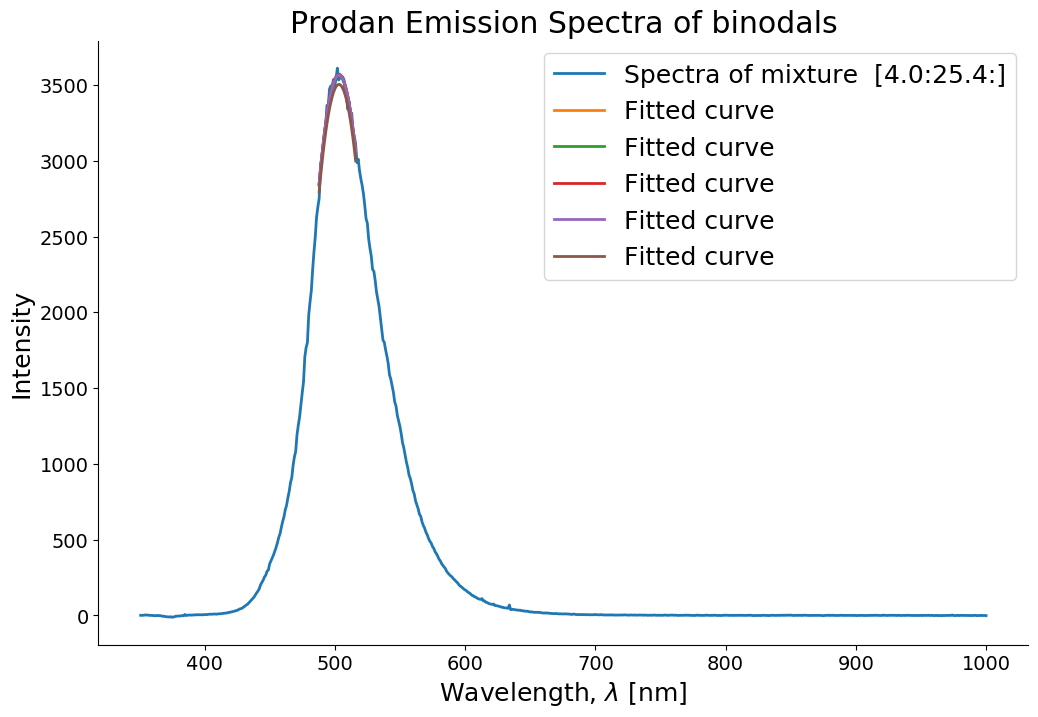

Ave. maximum wavelength for the sample is: 503.20555282788075 nm
Standard deviation for the max wavelength is: 0.019569831650286838


In [48]:
# Sliced list for the curve fitting
# yld_xy_sliced takes the start & end indexes and slices the wavelengths & intensities

sample02_bg = 488
sample02_end = 517

wv_fit_sample02_01,inten_fit_sample02_01 = yld_xy_sliced(raw_sample02_01,sample02_bg,sample02_end)
wv_fit_sample02_02,inten_fit_sample02_02 = yld_xy_sliced(raw_sample02_02,sample02_bg,sample02_end)
wv_fit_sample02_03,inten_fit_sample02_03 = yld_xy_sliced(raw_sample02_03,sample02_bg,sample02_end)
wv_fit_sample02_04,inten_fit_sample02_04 = yld_xy_sliced(raw_sample02_04,sample02_bg,sample02_end)
wv_fit_sample02_05,inten_fit_sample02_05 = yld_xy_sliced(raw_sample02_05,sample02_bg,sample02_end)

inten_fit_sample02 = [inten_fit_sample02_01,inten_fit_sample02_02,inten_fit_sample02_03,inten_fit_sample02_04,inten_fit_sample02_05]

# initial guess for fitted parameters, may need to be changed
# Initial guess for the curve para_curve = a*((x + b)**2) + c in the form [a,b,c]
# a changes curvature, b transforms in x-direction, c transforms in y-direction

initGuess02 = [-0.5,-500,1800]
f1_sample02 = []
max_wav_sample02 = []

for i in  range(len(inten_fit_sample02)):
    C_fit = yld_curve_fit_Y(para_curve,wv_fit_sample02_01,inten_fit_sample02[i],initGuess02)
    f1_individual = C_fit[0]
    max_wav_individual = C_fit[1]
    f1_sample02.append(f1_individual)
    max_wav_sample02.append(max_wav_individual)

ave_max_wav_sample02 = sum(max_wav_sample02)/len(max_wav_sample02)
std_max_wav_sample02 = np.std(max_wav_sample02,ddof=1)

fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.plot(wv_sample02_01,inten_sample02_01,marker = '',linestyle = '-',label = 'Spectra of mixture  [4.0:25.4:]')
plt.plot(wv_fit_sample02_01,f1_sample02[0],label = 'Fitted curve')
plt.plot(wv_fit_sample02_02,f1_sample02[1],label = 'Fitted curve')
plt.plot(wv_fit_sample02_03,f1_sample02[2],label = 'Fitted curve')
plt.plot(wv_fit_sample02_04,f1_sample02[3],label = 'Fitted curve')
plt.plot(wv_fit_sample02_05,f1_sample02[4],label = 'Fitted curve')

plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra of binodals')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity')
plt.show()

print('Ave. maximum wavelength for the sample is:',ave_max_wav_sample02,'nm')
print('Standard deviation for the max wavelength is:',std_max_wav_sample02)

### For the mixture with the component -- Water: Toluene: Ethanol = [10.0:4.9:]

In [49]:
# csv file format is 'vol W_ vol T_ vol E_sample no_rep no'

raw_sample03_01 = yld_rawdata(specFold+'10W_4.9T_24.6E_sample03_01.csv',6)
raw_sample03_02 = yld_rawdata(specFold+'10W_4.9T_24.6E_sample03_02.csv',6)
raw_sample03_03 = yld_rawdata(specFold+'10W_4.9T_24.6E_sample03_03.csv',6)
raw_sample03_04 = yld_rawdata(specFold+'10W_4.9T_24.6E_sample03_04.csv',6)
raw_sample03_05 = yld_rawdata(specFold+'10W_4.9T_24.6E_sample03_05.csv',6)

wv_sample03_01,inten_sample03_01 = yld_xy_sliced(raw_sample03_01)
wv_sample03_02,inten_sample03_02 = yld_xy_sliced(raw_sample03_02)
wv_sample03_03,inten_sample03_03 = yld_xy_sliced(raw_sample03_03)
wv_sample03_04,inten_sample03_04 = yld_xy_sliced(raw_sample03_04)
wv_sample03_05,inten_sample03_05 = yld_xy_sliced(raw_sample03_05)

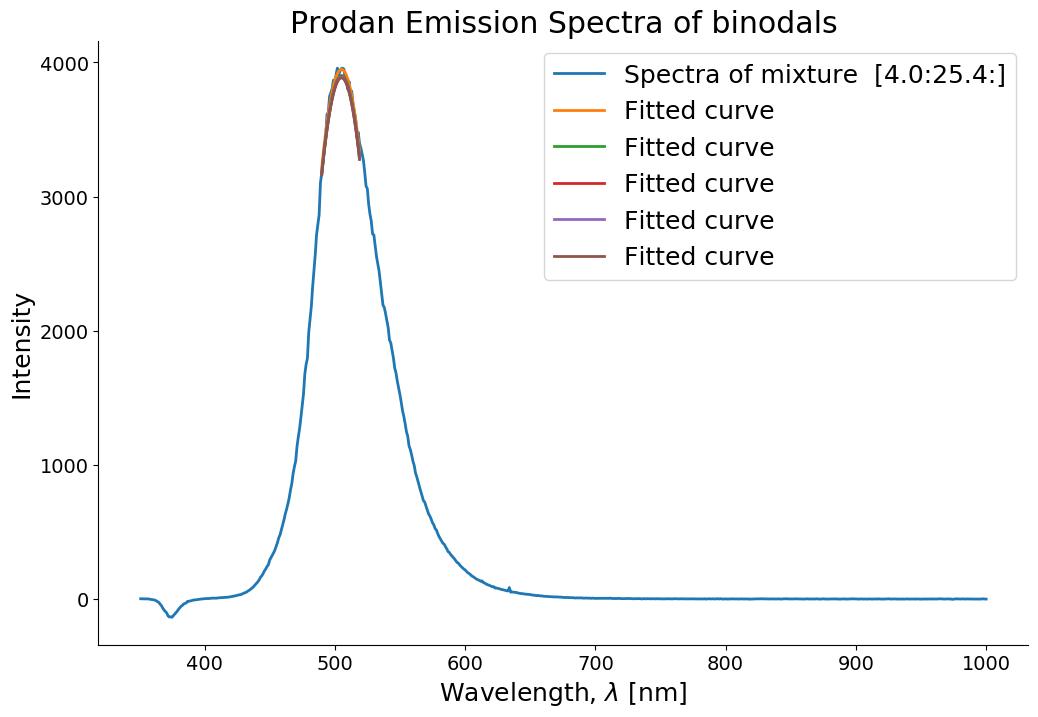

Ave. maximum wavelength for the sample is: 505.15714714765227 nm
Standard deviation for the max wavelength is: 0.023182083601149678


In [51]:
# Sliced list for the curve fitting
# yld_xy_sliced takes the start & end indexes and slices the wavelengths & intensities

sample03_bg = 490
sample03_end = 520

wv_fit_sample03_01,inten_fit_sample03_01 = yld_xy_sliced(raw_sample03_01,sample03_bg,sample03_end)
wv_fit_sample03_02,inten_fit_sample03_02 = yld_xy_sliced(raw_sample03_02,sample03_bg,sample03_end)
wv_fit_sample03_03,inten_fit_sample03_03 = yld_xy_sliced(raw_sample03_03,sample03_bg,sample03_end)
wv_fit_sample03_04,inten_fit_sample03_04 = yld_xy_sliced(raw_sample03_04,sample03_bg,sample03_end)
wv_fit_sample03_05,inten_fit_sample03_05 = yld_xy_sliced(raw_sample03_05,sample03_bg,sample03_end)

inten_fit_sample03 = [inten_fit_sample03_01,inten_fit_sample03_02,inten_fit_sample03_03,inten_fit_sample03_04,inten_fit_sample03_05]

# initial guess for fitted parameters, may need to be changed
# Initial guess for the curve para_curve = a*((x + b)**2) + c in the form [a,b,c]
# a changes curvature, b transforms in x-direction, c transforms in y-direction

initGuess03 = [-0.5,-500,1800]
f1_sample03 = []
max_wav_sample03 = []

for i in  range(len(inten_fit_sample03)):
    C_fit = yld_curve_fit_Y(para_curve,wv_fit_sample03_01,inten_fit_sample03[i],initGuess03)
    f1_individual = C_fit[0]
    max_wav_individual = C_fit[1]
    f1_sample03.append(f1_individual)
    max_wav_sample03.append(max_wav_individual)

ave_max_wav_sample03 = sum(max_wav_sample03)/len(max_wav_sample03)
std_max_wav_sample03 = np.std(max_wav_sample03,ddof=1)

fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.plot(wv_sample03_01,inten_sample03_01,marker = '',linestyle = '-',label = 'Spectra of mixture  [4.0:25.4:]')
plt.plot(wv_fit_sample03_01,f1_sample03[0],label = 'Fitted curve')
plt.plot(wv_fit_sample03_02,f1_sample03[1],label = 'Fitted curve')
plt.plot(wv_fit_sample03_03,f1_sample03[2],label = 'Fitted curve')
plt.plot(wv_fit_sample03_04,f1_sample03[3],label = 'Fitted curve')
plt.plot(wv_fit_sample03_05,f1_sample03[4],label = 'Fitted curve')

plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra of binodals')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity')
plt.show()

print('Ave. maximum wavelength for the sample is:',ave_max_wav_sample03,'nm')
print('Standard deviation for the max wavelength is:',std_max_wav_sample03)

### For the mixture with the component -- Water: Toluene: Ethanol = [16.5:1.0:]

In [58]:
# csv file format is 'vol W_ vol T_ vol E_sample no_rep no'

raw_sample04_01 = yld_rawdata(specFold+'16.5W_1T_16.7E_sample04_01.csv',6)
raw_sample04_02 = yld_rawdata(specFold+'16.5W_1T_16.7E_sample04_02.csv',6)
raw_sample04_03 = yld_rawdata(specFold+'16.5W_1T_16.7E_sample04_03.csv',6)
raw_sample04_04 = yld_rawdata(specFold+'16.5W_1T_16.7E_sample04_04.csv',6)
raw_sample04_05 = yld_rawdata(specFold+'16.5W_1T_16.7E_sample04_05.csv',6)

wv_sample04_01,inten_sample04_01 = yld_xy_sliced(raw_sample04_01)
wv_sample04_02,inten_sample04_02 = yld_xy_sliced(raw_sample04_02)
wv_sample04_03,inten_sample04_03 = yld_xy_sliced(raw_sample04_03)
wv_sample04_04,inten_sample04_04 = yld_xy_sliced(raw_sample04_04)
wv_sample04_05,inten_sample04_05 = yld_xy_sliced(raw_sample04_05)

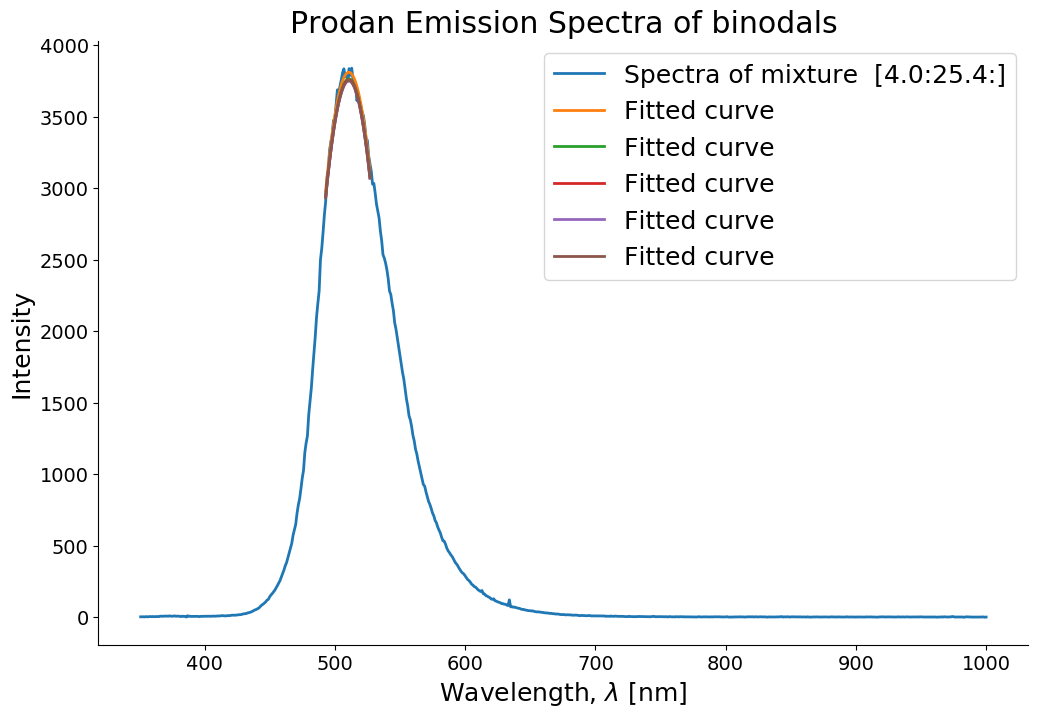

Ave. maximum wavelength for the sample is: 510.79481262199204 nm
Standard deviation for the max wavelength is: 0.018882302600965444


In [60]:
# Sliced list for the curve fitting
# yld_xy_sliced takes the start & end indexes and slices the wavelengths & intensities

sample04_bg = 493
sample04_end = 528

wv_fit_sample04_01,inten_fit_sample04_01 = yld_xy_sliced(raw_sample04_01,sample04_bg,sample04_end)
wv_fit_sample04_02,inten_fit_sample04_02 = yld_xy_sliced(raw_sample04_02,sample04_bg,sample04_end)
wv_fit_sample04_03,inten_fit_sample04_03 = yld_xy_sliced(raw_sample04_03,sample04_bg,sample04_end)
wv_fit_sample04_04,inten_fit_sample04_04 = yld_xy_sliced(raw_sample04_04,sample04_bg,sample04_end)
wv_fit_sample04_05,inten_fit_sample04_05 = yld_xy_sliced(raw_sample04_05,sample04_bg,sample04_end)

inten_fit_sample04 = [inten_fit_sample04_01,inten_fit_sample04_02,inten_fit_sample04_03,inten_fit_sample04_04,inten_fit_sample04_05]

# initial guess for fitted parameters, may need to be changed
# Initial guess for the curve para_curve = a*((x + b)**2) + c in the form [a,b,c]
# a changes curvature, b transforms in x-direction, c transforms in y-direction

initGuess04 = [-0.5,-500,180]
f1_sample04 = []
max_wav_sample04 = []

for i in  range(len(inten_fit_sample04)):
    C_fit = yld_curve_fit_Y(para_curve,wv_fit_sample04_01,inten_fit_sample04[i],initGuess04)
    f1_individual = C_fit[0]
    max_wav_individual = C_fit[1]
    f1_sample04.append(f1_individual)
    max_wav_sample04.append(max_wav_individual)

ave_max_wav_sample04 = sum(max_wav_sample04)/len(max_wav_sample04)
std_max_wav_sample04 = np.std(max_wav_sample04,ddof=1)

fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.plot(wv_sample04_01,inten_sample04_01,marker = '',linestyle = '-',label = 'Spectra of mixture  [4.0:25.4:]')
plt.plot(wv_fit_sample04_01,f1_sample04[0],label = 'Fitted curve')
plt.plot(wv_fit_sample04_02,f1_sample04[1],label = 'Fitted curve')
plt.plot(wv_fit_sample04_03,f1_sample04[2],label = 'Fitted curve')
plt.plot(wv_fit_sample04_04,f1_sample04[3],label = 'Fitted curve')
plt.plot(wv_fit_sample04_05,f1_sample04[4],label = 'Fitted curve')

plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra of binodals')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity')
plt.show()

print('Ave. maximum wavelength for the sample is:',ave_max_wav_sample04,'nm')
print('Standard deviation for the max wavelength is:',std_max_wav_sample04)

## Plot all the data on the same graph.

In [62]:
ave_wav_samples = [ave_max_wav_sample01,ave_max_wav_sample02,ave_max_wav_sample03,ave_max_wav_sample04]
std_wav_samples = [std_max_wav_sample01,std_max_wav_sample02,std_max_wav_sample03,std_max_wav_sample04]

print(ave_wav_samples)
print(std_wav_samples)

[499.7885468660831, 503.20555282788075, 505.15714714765227, 510.79481262199204]
[0.011503510474612568, 0.019569831650286838, 0.023182083601149678, 0.018882302600965444]


| Mass fraction ethanol | Mass fraction water | Mass fraction toluene | $\lambda_{max}$ / nm |
|:-:|:-:|:-:|:-:|
| 1 | 0 | 0 | 499.7375467965494 |
| 0 | 0 | 1 | 422.7707479023763 |
| 0.347 | 0.033 | 0.620 | 490.5 |
| 0.562 | 0.132 | 0.306 | 496.9 |
| 0.624 | 0.195 | 0.181 | 499.2 |
| 0 | 0 | 0 | 499.7885468660831 |
| 0 | 0 | 0 | 503.20555282788075 |
| 0.567 | 0.369 | 0.064 | 503.4 |
| 0 | 0 | 0 | 505.15714714765227 |
| 0 | 0 | 0 | 510.79481262199204 |
| 0 | 1 | 0 | 525.7577896073973 |